In [115]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
#packages for visual
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pickle

In [9]:
pwd

'C:\\Users\\prian'

In [73]:
dataset = pd.read_csv('C:\\Users\\prian\\Desktop\\Data.csv')
dataset.head()

,SSIP,SDFP,SDFB,SFE,RFIP,TYPE
0,41,38.977568,75.804607,41,51.612903,1
1,41,45.074802,119.721586,41,51.612903,1
2,13,83.516465,351.018888,26,100.000000,0
3,13,71.414284,307.680791,26,100.000000,0
4,11,58.823529,334.996292,22,100.000000,0


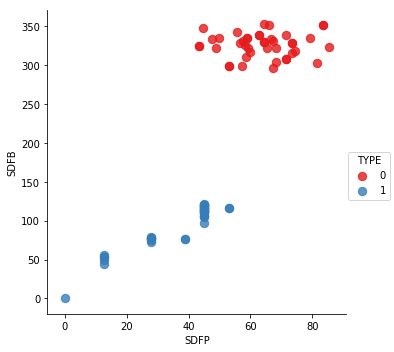

In [74]:
sns.lmplot('SDFP','SDFB', data = dataset, hue = 'TYPE', palette='Set1', fit_reg=False, scatter_kws={"s":70});

In [95]:
#Specifying the inputs to the model
model_inputs = dataset[['SDFP','SDFB']].as_matrix()
type_label=np.where(dataset["TYPE"]== 0, 0, 1)

In [96]:
#fit the model
model = svm.SVC(kernel='linear')
model.fit(model_inputs, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 120)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


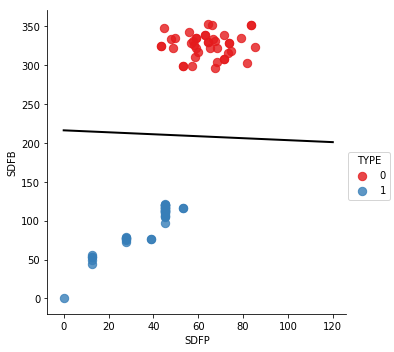

In [121]:
sns.lmplot('SDFP', 'SDFB', data=dataset, hue='TYPE', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

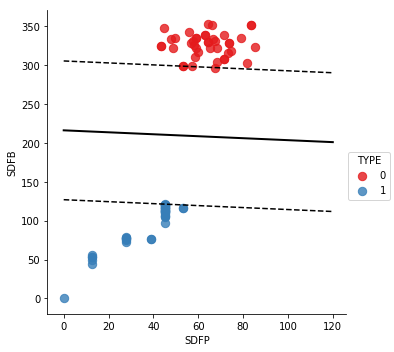

In [122]:
sns.lmplot('SDFP', 'SDFB', data=dataset, hue='TYPE', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [114]:

# Create a function to guess when a recipe is a muffin or a cupcake
def attack_segregation(SDFP, SDFB):
    if(model.predict([[SDFP, SDFB]]))==0:
        print('Normal Traffic')
    else:
        print('Attack Traffic')

In [123]:
attack_segregation(38, 75)

Attack Traffic


In [124]:
attack_segregation(12, 53)

Attack Traffic


In [125]:
attack_segregation(53, 299)

Normal Traffic!
